## E3 : Shortest Path Semantic Similarity Score

In this notebook we will be exploring the semantic relationship between student and reference responses using the following formula;

**shortest path**
$$
Sim_{path} = \frac{1}{length}
$$

where $length$ is the length of the shortest path between two concepts in the wordnet graph hierarchy using node-counting.


### Lemmatization

In this and future analyses we will probably be using lemmatization exclusively, it is unlikely we will be comparing the results with lemmatization and stemming since lemmatization has shown itself to be a better technique.

[Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) is the process of finding the lemma or dictionary form of a word.

### Complexity

This is a computationally time intensive method.

For every word in a student answer which is an open-class word we have to iterate through all the words in the model answer of the same class and find the semantic similarity between each word pair. This operation alone means the algorithm is $O(n^{2})$, however finding the concepts in wordnet takes even more time.

Given each student-teacher word pair $(w_{s}, w_{t})$ we have to find the synonyms of the student word $w_{s}$ and the synonyms of the teacher word $w_{t}$ and for each student word synonym we have to iterate over every teacher word synonym which is also a $O(n^{2})$ operation.

This means the overall computational complexity of the algorithm is $O(n^{4})$ which is pretty inefficent, but still manageable for smaller $n$ and can still definitely be deployed in production scenarios.

#### REFERENCES
1. Mohler - Text-to-Text similarity for ASAG

In [3]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.text2text as tt
from importlib import reload
import spacy
reload(tt)

<module 'libs.text2text' from '../libs/text2text.py'>

## E1.1 Shortest Path - v2.0_en

In [4]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

2442


In [32]:
e11_res = tt.run_entailment_model(nlp_en, df2_en, tt.shortest_path, add_lexical_matching=False)

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 18.223%
Precision: 51.202%
Recall: 18.223%
F1-Measure: 21.973%
Pearson's R: 0.41
Cohen's Kappa: 0.05
RMSE: 2.15
MAE: 1.75
Y-True Mean: 4.15
Y-Pred Mean: 2.50
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.37


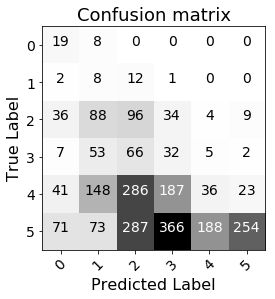

In [33]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.2 Shortest Path v2.0_en - with Lexical Matching for words which are not Open-Class.

In [34]:
e12_res = tt.run_entailment_model(nlp_en, df2_en, tt.shortest_path, add_lexical_matching=True)

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 20.762%
Precision: 52.271%
Recall: 20.762%
F1-Measure: 25.198%
Pearson's R: 0.44
Cohen's Kappa: 0.07
RMSE: 2.06
MAE: 1.66
Y-True Mean: 4.15
Y-Pred Mean: 2.60
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.40


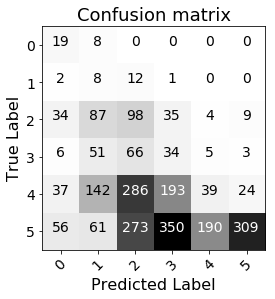

In [35]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))

## E1.3 Shortest Path v2.0_es - no Lexical Matching

In [37]:
# Load Dataset
reload(tt)
df2_es = utils.load_dataframe(language='es', version=2)
print(len(df2_es))

nlp_es = spacy.load('es')

e13_res = tt.run_entailment_model(nlp_es, df2_es, tt.shortest_path, lang='spa', add_lexical_matching=False)

2442
batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 9.869%
Precision: 50.725%
Recall: 9.869%
F1-Measure: 12.206%
Pearson's R: 0.28
Cohen's Kappa: 0.02
RMSE: 3.01
MAE: 2.64
Y-True Mean: 4.15
Y-Pred Mean: 1.54
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.37


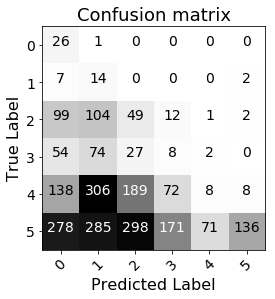

In [38]:
stats.print_big4(e13_res['y_true'], e13_res['y_pred'])
stats.print_stats(e13_res['y_true'], e13_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e13_res['y_true'], e13_res['y_pred']), classes=np.unique(e13_res['y_true']))

## E1.4 Shortest Path v2.0_es - with Lexical Matching

In [39]:
e14_res = tt.run_entailment_model(nlp_es, df2_es, tt.shortest_path, lang='spa', add_lexical_matching=True)

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 10.975%
Precision: 51.423%
Recall: 10.975%
F1-Measure: 13.970%
Pearson's R: 0.29
Cohen's Kappa: 0.03
RMSE: 2.98
MAE: 2.60
Y-True Mean: 4.15
Y-Pred Mean: 1.59
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.42


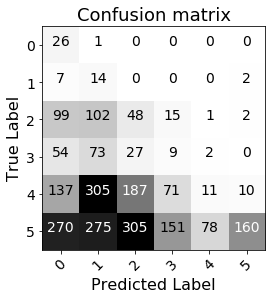

In [40]:
stats.print_big4(e14_res['y_true'], e14_res['y_pred'])
stats.print_stats(e14_res['y_true'], e14_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e14_res['y_true'], e14_res['y_pred']), classes=np.unique(e14_res['y_true']))